# Numerical Solutions for the Bethe Equations

## Goal

Solve the system of equations

$z_1^L = -\frac{1 + z_1 z_2 - \Delta z_1}{1 + z_1 z_2 - \Delta z_2}$


$z_2^L = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

and check the identity

$\mathbf{1}((x_1 < x_2) = (y_1 < y_2) \mod L) = \sum_{z \in Sol} \frac{B_1(z_1, z_2)B_2(z_1, z_2)}{z_1^{y_1+1}z_2^{y_2+1}}\left(z_1^{x_1} z_2^{x_2} +A(z_1, z_2) z_1^{x_2} z_2^{x_1} \right)$

with 

$B_1(z_1, z_2) =\left( Lz_1^{L-1} + \frac{\Delta z_2 (z_1-z_2)}{(1 + z_1 z_2 -\Delta z_2)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta  z_2)}   \right)^{-1}$

$B_2(z_1, z_2) =\left( Lz_2^{L-1} + \frac{\Delta z_1 (z_2-z_1)}{(1 + z_1 z_2 -\Delta z_1)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta z_1 )}   \right)^{-1}$

$A(z_1, z_2) = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

so that $Sol$ is the set of all the solution to the system of equations above.

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/tmp/ipykernel_1052/3156728878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


### Example: Finding roots

The code below finds the roots of the polynomial $z^2-1$.

In [2]:
coeff = [1, 0, -1]
sol = np.roots(coeff)
print(sol)

[-1.  1.]


## Numerical Solutions

We solve the system of equations by a fix point method: 

$(z_{1,n}, z_{2,n}) \rightarrow (z_1, z_2)$ as $n\rightarrow \infty$.

The sequence converges to a solution. We define the sequence as follows:

$z_{1, n+1} = A^{-1/L}(z_{1, n}, z_{2,n})$ and $z_{2, n+1} = A^{1/L}(z_{1, n}, z_{2,n})$.

Since there are $L$ roots of unity, we have to make a choice of which root to pick and we pick the one that is closest to the previous one. That is, we are looking for the roots of the polynomials

$z_{1, n+1}^{L} - A^{-1}(z_{1, n}, z_{2,n})$ and $z_{2, n+1}^L = A(z_{1, n}, z_{2,n})$

with respect to $z_{n+1}$.

### Defining the constant coefficient

We define the $A(z_1, z_2)$ and $A^{-1}(z_1, z_2)$ as the coefficients $c1$ and $c2$ for the pair of polynomial equations.

In [3]:
def c2(z1, z2, d):
    return -(1 + z1*z2 - d*z2)/(1+ z1*z2 - d*z1)

def c1(z1, z2, d):
    return -(1 + z1*z2 - d*z1)/(1+z1*z2 - d*z2)

In [4]:
c1(2, 3, 4)

-0.2

In [5]:
c2(2,3,4)

-5.0

In [6]:
c1(2, 3, 4)*c2(2, 3, 4)

1.0

### Defining the polynomial

A polynomial is defined as a list of coefficients. The polynimials that we are trying to solve

$z_1^L - c1 =0$  and $z_2^L - c_2==0$

corresponds to the list

[1, 0, ... , 0, -c1] and [1, 0, ... , -c2].

We define a functions below to give such lists.

In [7]:
def pol_coeff1(l, z1, z2, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c1(z1, z2, d))
    return coeff

In [8]:
pol_coeff1(5, 2, 3, 4)
np.roots(pol_coeff1(5, 2, 3, 4))

array([-0.72477966+0.j        , -0.22396923+0.68930642j,
       -0.22396923-0.68930642j,  0.58635907+0.4260148j ,
        0.58635907-0.4260148j ])

In [9]:
def pol_coeff2(l, z1, z2, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c2(z1, z2, d))
    return coeff

In [10]:
pol_coeff2(5, 2, 3, 4)

[1, 0, 0, 0, 0, 5.0]

In [11]:
pol_coeff2(2, 1, 1, 0)

[1, 0, 1.0]

### Finding close solutions

When we obtain the solutions of the polynomial equations, we obtain $L$ solutions but we are only interested in the solution that is closest to the previous element of the sequence $(z_{1,n}, z_{2,n})$. The code below solves the polynomials and returns the "closest" solutions.

In [12]:
def close_sol1(l, z1, z2, d, s ):
    sols = np.roots(pol_coeff1(l, z1, z2, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s


In [13]:
close_sol1(2, 1j, -1j, 0.1, 1j)

(0.049937616943892205+0.9987523388778446j)

In [14]:
def close_sol2(l, z1, z2, d, s ):
    sols = np.roots(pol_coeff2(l, z1, z2, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s

In [15]:
close_sol2(2, 1j, -1j, 0.1, 1j)

(-0.04993761694389226+0.9987523388778448j)

### Setting up a recursion

We now set up a recursion to give us the an arbitrary element of the sequence $(z_{1,n}, z_{2,n})$. The starting point of the recursion is label by an index $(k_1, k_2)$ so that $k_i \in \{1, \dots, L\}$ and 

$(z_{1,0}, z_{2,0}) = (e^{2 \pi i k_1/L}, e^{2\pi i k_2/L})$,

i.e. the solutions of the system of equations with $\Delta = 0$.

Notation: n= trails.

In [16]:
l=5
sol = np.roots(pol_coeff1(l, 0, 0, 0))
print(sol)
z= [sol[1], sol[2]]
print(z)


[-1.        +0.j         -0.30901699+0.95105652j -0.30901699-0.95105652j
  0.80901699+0.58778525j  0.80901699-0.58778525j]
[(-0.3090169943749479+0.9510565162951541j), (-0.3090169943749479-0.9510565162951541j)]


In [17]:
d=.1
z= [close_sol1(l , z[0], z[1], d, z[0]), close_sol2(l, z[0], z[1], d, z[1])]
print(z)

[(-0.2911619922237325+0.9566737658597665j), (-0.2911619922237325-0.9566737658597665j)]


In [18]:
def sol_sys(l, d, k1, k2, trails):
    sol = np.roots(pol_coeff1(l, 0, 0, 0))
    z = [sol[k1], sol[k2]]
    for i in range(trails):
        z=[close_sol1(l , z[0], z[1], d, z[0]), close_sol2(l, z[0], z[1], d, z[1])]
    return (z[0], z[1])

In [19]:
sol_sys(5, 0.1, 1, 2, 30)

((-0.2910397456371135+0.956710962861556j),
 (-0.2910397456371135-0.956710962861556j))

In [20]:
sol_sys(5, 0.1, 0, 1, 30)

((-0.9999004932239454-0.01410686536793182j),
 (-0.2955698188574211+0.955321140863423j))

In [21]:
sol_sys(5, 10, 0, 1, 30)

((-0.9434203418185536-0.33159924403255625j),
 (0.023836703374754385+0.9997158654198816j))

### Checking the solution

We check the solution by showing that 

$z_{1,n}^L - A^{-1}(z_n)$ and $z_{2,n}^{L} - A(z_n)$

are close to zero.

Notation: n= trails.

In [22]:
l=5
d=0.1
k1=1
k2=4
trails=30
z= sol_sys(l, d, k1, k2, trails)
print(z[0]**l - c1(z[0], z[1], d))
print(z[1]**l- c2(z[0], z[1], d))

(-6.661338147750939e-16-2.789435349370706e-15j)
(-8.881784197001252e-16-8.604228440844963e-16j)


### Checking that all solutions are different

We check that all the solutions labelled by the indexes $(k_1, k_2)$ with $k_i \in \{1, \dots, L\}$ are distinct. This proves that we have found all the different solutions.

In [23]:
[(i,j) for i in range(l) for j in range(i+1, l)]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [24]:
l=5
d=.1
trails=300
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
print(all_sol)

[((-0.9999004932239464-0.014106865367932042j), (-0.29556981885742145+0.9553211408634232j)), ((-0.9999004932239464+0.014106865367932042j), (-0.29556981885742145-0.9553211408634232j)), ((-0.9982161702461371-0.05970324496318047j), (0.8426665326923638+0.5384358036760087j)), ((-0.9982161702461371+0.05970324496318047j), (0.8426665326923638-0.5384358036760087j)), ((-0.29556981885742145+0.9553211408634232j), (-0.9999004932239464-0.014106865367932042j)), ((-0.2910397456371135+0.956710962861556j), (-0.2910397456371135-0.956710962861556j)), ((-0.2695024611955084+0.9629997006279731j), (0.7840690931242289+0.6206735512387719j)), ((-0.28631282465912894+0.9581361940954486j), (0.8227661423655492-0.5683800444921631j)), ((-0.29556981885742145-0.9553211408634232j), (-0.9999004932239464+0.014106865367932042j)), ((-0.2910397456371135-0.956710962861556j), (-0.2910397456371135+0.956710962861556j)), ((-0.28631282465912894-0.9581361940954486j), (0.8227661423655492+0.5683800444921631j)), ((-0.2695024611955084-0.

In [25]:
diff =[abs(x[0]-y[0])+abs(x[1]-y[1]) for x in all_sol for y in all_sol if x != y]
diff.sort()
print(diff)

[1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1962780972783784, 1.1962780972783784, 1.1962780972783784, 1.1962780972783784, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657,

### Plotting the solutions

We plot the solutions.

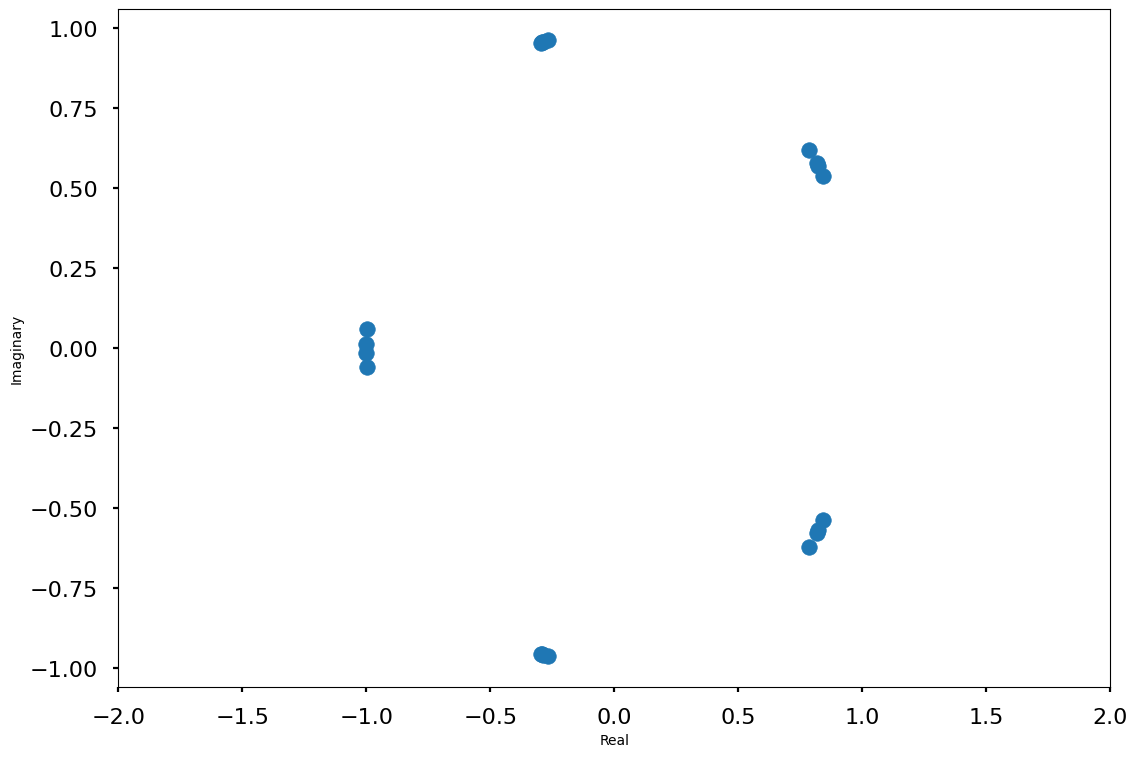

In [26]:
# import library
import matplotlib.pyplot as plt


# extract real part
x = [ele[1].real for ele in all_sol]
# extract imaginary part
y = [ele[1].imag for ele in all_sol]

# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.xlim([-2,2])
plt.show()


## Checking the initial conditons

We check the identity

$\mathbf{1}((x_1 < x_2) = (y_1 < y_2) \mod L) = \sum_{z \in Sol} \frac{B_1(z_1, z_2)B_2(z_1, z_2)}{z_1^{y_1+1}z_2^{y_2+1}}\left(z_1^{x_1} z_2^{x_2} +A(z_1, z_2) z_1^{x_2} z_2^{x_1} \right)$

with 

$B_1(z_1, z_2) =\left( Lz_1^{L-1} + \frac{\Delta z_2 (z_1-z_2)}{(1 + z_1 z_2 -\Delta z_2)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta  z_2)}   \right)^{-1}$

$B_2(z_1, z_2) =\left( Lz_2^{L-1} + \frac{\Delta z_1 (z_2-z_1)}{(1 + z_1 z_2 -\Delta z_1)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta z_1 )}   \right)^{-1}$

$A(z_1, z_2) = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

so that $Sol$ is the set of all the solution to the system of equations above.

### Define A(z1, z2) function

In [27]:
def A(z1, z2, d):
    return (-1)* (1 + z1*z2 - d*z2)/(1 + z1 *z2 - d*z1)

In [28]:
A(1,2,4)

-5.0

In [29]:
d=0.1
A(all_sol[1][0], all_sol[1][1], d)


(-0.9975133206205744-0.07047818942421406j)

In [30]:
d=0.1
[A(sol[0], sol[1],d) for sol in all_sol]

[(-0.9975133206205744+0.07047818942421406j),
 (-0.9975133206205744-0.07047818942421406j),
 (-0.955721667149654+0.2942721443505743j),
 (-0.955721667149654-0.2942721443505743j),
 (-0.9975133206205743-0.07047818942421415j),
 (-0.9955637246025222-0.09408969261058067j),
 (-0.9787720322818798-0.20495196711132008j),
 (-0.9929379799478917-0.11863459856635383j),
 (-0.9975133206205743+0.07047818942421415j),
 (-0.9955637246025222+0.09408969261058067j),
 (-0.9929379799478917+0.11863459856635383j),
 (-0.9787720322818798+0.20495196711132008j),
 (-0.9557216671496547-0.2942721443505744j),
 (-0.9787720322818787+0.20495196711131983j),
 (-0.9929379799478918-0.11863459856635387j),
 (-0.9981861191474779-0.060203584123347934j),
 (-0.9557216671496547+0.2942721443505744j),
 (-0.9929379799478918+0.11863459856635387j),
 (-0.9787720322818787-0.20495196711131983j),
 (-0.9981861191474779+0.060203584123347934j)]

### Define B1 and B2 function

In [31]:
def B1 (z1, z2 ,l, d):
    b= l* (z1**(l-1))
    b = b+ (d* z2 *(z1-z2)/((1+z1*z2- d*z2) *(1+z1*z2- d*z2)))
    b = b - (d/(1+z1*z2- d*z2))
    b= 1/b
    return b

In [32]:
l=5
d=0.1
sol = all_sol[0]
B1(sol[0], sol[1], l,d)

(0.20064227880088642-0.011334142878345051j)

In [33]:
l=5
d=0.1
[B1(sol[0], sol[1], l,d) for sol in all_sol]

[(0.20064227880088642-0.011334142878345051j),
 (0.20064227880088642+0.011334142878345051j),
 (0.18076970607512177-0.04403721608649314j),
 (0.18076970607512177+0.04403721608649314j),
 (0.07350198332246927-0.1891745916759927j),
 (0.07620497807492242-0.1856302561506414j),
 (0.08372501454263193-0.16109949481037758j),
 (0.07862762390692232-0.18125796402329633j),
 (0.07350198332246927+0.1891745916759927j),
 (0.07620497807492242+0.1856302561506414j),
 (0.07862762390692232+0.18125796402329633j),
 (0.08372501454263193+0.16109949481037758j),
 (-0.1436144069543392-0.1692910856597122j),
 (-0.18720360326905144-0.09349400089097278j),
 (-0.15070953789436897-0.13310527906786943j),
 (-0.1546658506252592-0.12418217925259413j),
 (-0.1436144069543392+0.1692910856597122j),
 (-0.15070953789436897+0.13310527906786943j),
 (-0.18720360326905144+0.09349400089097278j),
 (-0.1546658506252592+0.12418217925259413j)]

In [34]:
def B2 (z1, z2 ,l, d):
    b= l* (z2**(l-1))
    b = b+ (d* z1 *(z2-z1)/((1+z1*z2- d*z1) *(1+z1*z2- d*z1)))
    b = b - (d/(1+z1*z2- d*z1))
    b= 1/b
    return b

In [35]:
l=5
d=0.1
[B2(sol[0], sol[1], l,d) for sol in all_sol]

[(0.07350198332246927-0.1891745916759927j),
 (0.07350198332246927+0.1891745916759927j),
 (-0.1436144069543392-0.1692910856597122j),
 (-0.1436144069543392+0.1692910856597122j),
 (0.20064227880088642-0.011334142878345051j),
 (0.07620497807492242+0.1856302561506414j),
 (-0.18720360326905144-0.09349400089097278j),
 (-0.15070953789436897+0.13310527906786943j),
 (0.20064227880088642+0.011334142878345051j),
 (0.07620497807492242-0.1856302561506414j),
 (-0.15070953789436897-0.13310527906786943j),
 (-0.18720360326905144+0.09349400089097278j),
 (0.18076970607512177-0.04403721608649314j),
 (0.08372501454263193-0.16109949481037758j),
 (0.07862762390692232+0.18125796402329633j),
 (-0.1546658506252592+0.12418217925259413j),
 (0.18076970607512177+0.04403721608649314j),
 (0.07862762390692232-0.18125796402329633j),
 (0.08372501454263193+0.16109949481037758j),
 (-0.1546658506252592-0.12418217925259413j)]

### Define a function for the terms inside the summation

In [36]:
def term_ic(x1, x2, y1, y2, l, d, sol):
    term = B1(sol[0], sol[1], l, d)* B2(sol[0], sol[1], l, d)/((sol[0]**(y1+1)) *(sol[1]**(y2+1)))
    term = term*((sol[0]**x1)*(sol[1]**x2) + A(sol[0], sol[1], d)*(sol[0]**x2)*(sol[1]**x1) )
    return term

In [37]:
l=5
d=0.1
sol = all_sol[1]
term_ic(1, 2, 1, 2, l, d, sol)

(0.02655235003955873+0.03822152440204417j)

In [38]:
l=5
d=0.1
[term_ic(1, 2, 1, 2, l, d, sol) for sol in all_sol]

[(0.02655235003955873-0.03822152440204417j),
 (0.02655235003955873+0.03822152440204417j),
 (0.06985796757698914-0.029846201038300105j),
 (0.06985796757698914+0.029846201038300105j),
 (0.026552350039558748+0.03822152440204419j),
 (0.07145205462493578+0.025470587753747203j),
 (0.030804574967993183-0.03730521000298348j),
 (0.07345053800627666-0.021000583020212082j),
 (0.026552350039558748-0.03822152440204419j),
 (0.07145205462493578-0.025470587753747203j),
 (0.07345053800627666+0.021000583020212082j),
 (0.030804574967993183+0.03730521000298348j),
 (0.06985796757698914+0.029846201038300334j),
 (0.030804574967993336+0.03730521000298323j),
 (0.07345053800627668-0.021000583020212j),
 (0.028545216378475888-0.03783205805784352j),
 (0.06985796757698914-0.029846201038300334j),
 (0.07345053800627668+0.021000583020212j),
 (0.030804574967993336-0.03730521000298323j),
 (0.028545216378475888+0.03783205805784352j)]

### Define a function for the summation

In [39]:
def F_ic(x1, x2, y1, y2, l, d, all_sol):
    terms = [term_ic(x1, x2, y1, y2, l, d, sol) for sol in all_sol]
    return sum(terms)

In [40]:
l=5
d=0.1
x1=1
x2=3
y1=1
y2=2
F_ic(x1, x2, y1, y2, l,d, all_sol)

(-0.00017972613715512564+0j)

### We check the identity

In [42]:
X= [(i+1, j+1) for i in range(l) for j in range(l) if i<j]
print(X)
print(X[0][0])
print(X[0][1])

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
1
2


In [47]:
l=5
d=0.1
trails=30000
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
print(all_sol)

[((-0.9999004932239475-0.014106865367931598j), (-0.29556981885742073+0.9553211408634222j)), ((-0.9999004932239475+0.014106865367931598j), (-0.29556981885742073-0.9553211408634222j)), ((-0.9982161702461371-0.05970324496318047j), (0.8426665326923638+0.5384358036760087j)), ((-0.9982161702461371+0.05970324496318047j), (0.8426665326923638-0.5384358036760087j)), ((-0.29556981885742073+0.9553211408634222j), (-0.9999004932239475-0.014106865367931598j)), ((-0.2910397456371135+0.956710962861556j), (-0.2910397456371135-0.956710962861556j)), ((-0.2695024611955077+0.9629997006279722j), (0.7840690931242293+0.6206735512387719j)), ((-0.28631282465912894+0.9581361940954486j), (0.8227661423655492-0.5683800444921631j)), ((-0.29556981885742073-0.9553211408634222j), (-0.9999004932239475+0.014106865367931598j)), ((-0.2910397456371135-0.956710962861556j), (-0.2910397456371135+0.956710962861556j)), ((-0.28631282465912894-0.9581361940954486j), (0.8227661423655492+0.5683800444921631j)), ((-0.2695024611955077-0.

0 trails

In [ ]:
y1=1
y2=2
X= [(i+1, j+1) for i in range(l) for j in range(l) if i<j]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.002952724905209+0j), (-0.004648477007776854+1.3877787807814457e-17j), (-0.03757409824241644-6.938893903907228e-18j), (0.015750430895559803-6.938893903907228e-18j), (-0.013303336696946166-2.0816681711721685e-17j), (0.002442050728842321+1.3877787807814457e-17j), (0.038693918672831035-2.7755575615628914e-17j), (0.017207951925788566+6.938893903907228e-18j), (-0.0018104590827346945-6.938893903907228e-18j), (-0.015422528218888551+0j)]
(1.0042881778794681-3.469446951953614e-17j)


1 trail

In [ ]:
y1=1
y2=2
X= [(i+1, j+1) for i in range(l) for j in range(l) if i<j]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.001367969663171+2.0816681711721685e-17j), (-3.8934112978582236e-05-6.938893903907228e-18j), (0.00011854908137427789-6.938893903907228e-18j), (-0.0032015988000751033+0j), (-0.0013994139247976226-6.938893903907228e-18j), (0.0012791614606793567+2.7755575615628914e-17j), (-0.00046403459682210074+6.938893903907228e-18j), (0.0006565304444647209+6.938893903907228e-18j), (-0.002402721203353664+0j), (0.0003349383746709643+6.938893903907228e-18j)]
(0.9962504463863333+4.85722573273506e-17j)


10 trails

In [ ]:
y1=1
y2=2
X= [(i+1, j+1) for i in range(l) for j in range(l) if i<j]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.0026562643700991+0j), (-0.00017972613715638852+6.938893903907228e-18j), (0.0004953443465689836+0j), (-0.002145920885743228+0j), (-0.0021459208857532164+1.3877787807814457e-17j), (0.0004953443465687962-2.7755575615628914e-17j), (-0.00017972613715409869+0j), (0.0008041437177645702-6.938893903907228e-18j), (-0.0006570057333846607+6.938893903907228e-18j), (0.0008041437177611563+0j)]
(0.999946940719571-6.938893903907228e-18j)


100 trails

In [ ]:
y1=1
y2=2
X= [(i+1, j+1) for i in range(l) for j in range(l) if i<j]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.0026562643700956+1.3877787807814457e-17j), (-0.00017972613715649954-6.938893903907228e-18j), (0.0004953443465735771-6.938893903907228e-18j), (-0.002145920885749837-6.938893903907228e-18j), (-0.0021459208857497955+0j), (0.0004953443465723767+0j), (-0.00017972613715599994-1.3877787807814457e-17j), (0.0008041437177613298+0j), (-0.0006570057333915719+6.938893903907228e-18j), (0.0008041437177618918-6.938893903907228e-18j)]
(0.999946940719561-2.0816681711721685e-17j)


1000 trails

In [45]:
y1=1
y2=2
X= [(i+1, j+1) for i in range(l) for j in range(l) if i<j]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.0026562643700954+0j), (-0.00017972613715566688+0j), (0.0004953443465722726+6.938893903907228e-18j), (-0.002145920885750354+6.938893903907228e-18j), (-0.002145920885750878+4.163336342344337e-17j), (0.0004953443465724322+2.7755575615628914e-17j), (-0.0001797261371552228+0j), (0.0008041437177620236+0j), (-0.0006570057333917592+0j), (0.0008041437177619265-6.938893903907228e-18j)]
(0.9999469407195601+7.632783294297951e-17j)


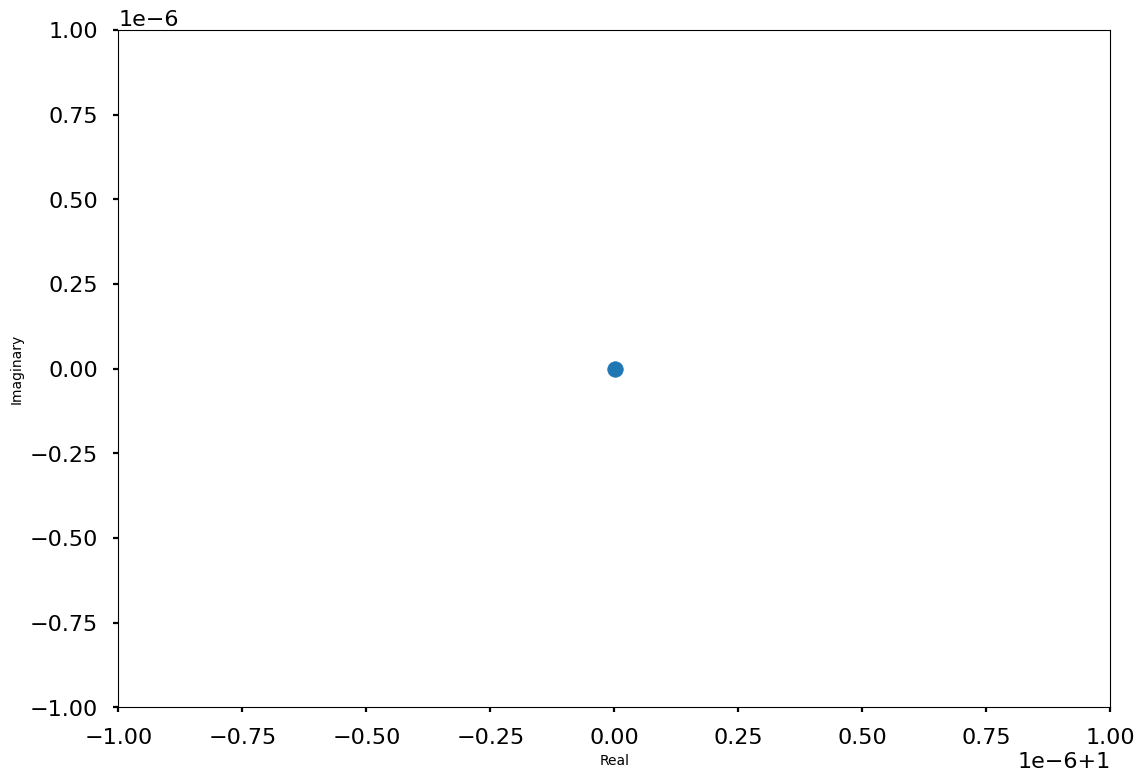

In [ ]:
# import library
import matplotlib.pyplot as plt


# extract real part
Real = [ele.real for ele in values]
# extract imaginary part
Imaginary = [ele.imag for ele in values]

# plot the complex numbers
plt.scatter(Real, Imaginary)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.xlim([1-0.000001,1.000001])
plt.ylim([-0.000001,0.000001])
plt.show()